In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class Perceptron:

    def __init__(self, taxa_aprendizado=0.1, epochs=100):
        
        self.taxa_aprendizado = taxa_aprendizado
        self.epochs = epochs
        self.pesos = None
        self.bias = 0

    def funcao_ativacao(self,x):
        return 1 if x >=0 else 0

    def prever(self,X):

        soma_ponderada = np.dot(X, self.pesos) + self.bias

        return self.funcao_ativacao(soma_ponderada)

    def treinar(self, X, y):
        n_amostras, n_caracteristicas = X.shape

        self.pesos = np.random.randn(n_caracteristicas) * 0.1
        self.bias = 0

        for epoch in range(self.epochs):
            mudancas = 0

            for i in range(n_amostras):

                previsao = self.prever(X[i])

                erro = y[i] - previsao

                if erro != 0:
                    self.pesos += self.taxa_aprendizado * erro * X[i]
                    self.bias += self.taxa_aprendizado * erro
                    mudancas += 1
            
            print(f"Época: {epoch + 1}: {mudancas} ajustes")
            if mudancas == 0:
                print("Treinamento concluído")
                break



In [12]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

y =np.array([
    0,
    0,
    0,
    1
])

print("PERCEPTRON SIMPLES")

for i in range(len(X)):
    print(f'Entrada: {X[i]} -> Sáida esperada: {y[i]}')

PERCEPTRON SIMPLES
Entrada: [0 0] -> Sáida esperada: 0
Entrada: [0 1] -> Sáida esperada: 0
Entrada: [1 0] -> Sáida esperada: 0
Entrada: [1 1] -> Sáida esperada: 1


In [17]:
pesos = np.array([0.5, 0.5])
bias = -0.7

percp = Perceptron()
percp.treinar(X,y)

print("Pesos Finais:", percp.pesos)
print("Viés Final:", percp.bias)

Época: 1: 2 ajustes
Época: 2: 3 ajustes
Época: 3: 1 ajustes
Época: 4: 0 ajustes
Treinamento concluído
Pesos Finais: [0.17781242 0.08941156]
Viés Final: -0.2


In [18]:
print("TESTES")

for entrada in X:
    previsao = percp.prever(entrada)
    print(f"Entrada: {entrada} -> previsão: {previsao}")

TESTES
Entrada: [0 0] -> previsão: 0
Entrada: [0 1] -> previsão: 0
Entrada: [1 0] -> previsão: 0
Entrada: [1 1] -> previsão: 1


In [19]:
def visualizar_perceptron(perceptron, X, y):

    plt.figure(figsize=(8, 6))
    cores = ['red' if valor == 0 else 'blue' for valor in y]
    plt.scatter(X[:,0], X[:,1], c=cores,s=100) 

    x1_min,x1_max = -0.5,1.5
    x1_vals = np.linspace(x1_min,x1_max, 100)

    if perceptron.pesos[1] != 0:
        x2_vals = (-perceptron.pesos[0] * x1_vals - perceptron.bias)/ perceptron.pesos[1]
        plt.plot(x1_vals,x2_vals, 'g-', linewidth=2, label='Reta de decisão')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('Perceptron - Reta de Decisão')
    plt.legend()
    plt.grid(True)
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.show()

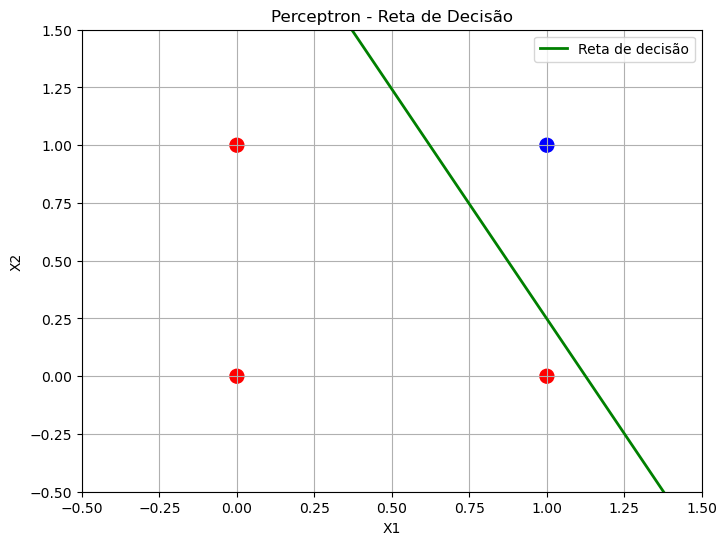

In [20]:
visualizar_perceptron(percp,X,y)